Building Permit DSBI Project 

In [33]:
#Importing the necessary libraries
%pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the evaluation parameters
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for math


Connecting CSV File

In [34]:
df = pd.read_csv('Building_Permits_20250331.csv')
df.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1
0,3001776-EX,Commercial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,NaN,NaN,NaN,NaN,...,3001776-LU,2701 EASTLAKE AVE E,SEATTLE,WA,98102.0,NaN,https://services.seattle.gov/portal/customize/...,47.644647,-122.326104,"(47.64464664, -122.32610372)"
1,3002070-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land use perm...,NaN,NaN,NaN,NaN,...,3002070-LU,6519 S BANGOR ST,SEATTLE,WA,98178.0,NaN,https://services.seattle.gov/portal/customize/...,47.505890,-122.251721,"(47.50588981, -122.25172068)"
2,3002715-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: LAND USE PERM...,NaN,NaN,NaN,NaN,...,3002715-LU,5509 13TH AVE S,SEATTLE,WA,98108.0,NaN,https://services.seattle.gov/portal/customize/...,47.553103,-122.316554,"(47.55310307, -122.31655355)"
3,3002774-EX,NaN,NaN,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANACELED 8-...,NaN,NaN,NaN,NaN,...,3002774-LU,320 NE 97TH ST,SEATTLE,WA,98115.0,NaN,https://services.seattle.gov/portal/customize/...,47.699438,-122.324688,"(47.69943793, -122.32468755)"
4,3002989-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Council land ...,NaN,NaN,NaN,NaN,...,3002989-LU,3012 NE 140TH ST,SEATTLE,WA,98125.0,NaN,https://services.seattle.gov/portal/customize/...,47.730305,-122.296016,"(47.73030516, -122.29601552)"


Data Preprocessing (Handle missing values, duplicate records. Perform Data transformation [scaling, encoding, normalization])

In [35]:
df.describe()

,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,OriginalZip,Latitude,Longitude
count,32614.000000,85214.000000,85214.000000,1.447260e+05,167855.000000,176629.000000,176629.000000
mean,32.143650,0.215059,2.990717,1.294465e+06,98103.941604,47.625609,-122.334216
std,5537.306975,2.248925,22.912343,9.343687e+07,1266.813438,0.055795,0.038286
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,47.488602,-122.430368
25%,0.000000,0.000000,0.000000,1.683250e+04,98106.000000,47.582517,-122.363454
50%,0.000000,0.000000,0.000000,6.892700e+04,98116.000000,47.628046,-122.333558
75%,1.000000,0.000000,1.000000,2.626640e+05,98125.000000,47.670644,-122.303988
max,1000000.000000,272.000000,891.000000,2.500000e+10,98199.000000,47.734009,-122.221100


In [36]:
df.info()
#This provides information about the data types, non-null values, and memory usage of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179762 entries, 0 to 179761
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PermitNum              179762 non-null  object 
 1   PermitClass            173018 non-null  object 
 2   PermitClassMapped      173018 non-null  object 
 3   PermitTypeMapped       179762 non-null  object 
 4   PermitTypeDesc         168247 non-null  object 
 5   Description            179164 non-null  object 
 6   HousingUnits           32614 non-null   float64
 7   HousingUnitsRemoved    85214 non-null   float64
 8   HousingUnitsAdded      85214 non-null   float64
 9   EstProjectCost         144726 non-null  float64
 10  AppliedDate            137759 non-null  object 
 11  IssuedDate             130720 non-null  object 
 12  ExpiresDate            130883 non-null  object 
 13  CompletedDate          99402 non-null   object 
 14  StatusCurrent          179762 non-nu

In [37]:
#This will return the count of null (missing) values for each column
df.isnull().sum()

PermitNum                     0
PermitClass                6744
PermitClassMapped          6744
PermitTypeMapped              0
PermitTypeDesc            11515
Description                 598
HousingUnits             147148
HousingUnitsRemoved       94548
HousingUnitsAdded         94548
EstProjectCost            35036
AppliedDate               42003
IssuedDate                49042
ExpiresDate               48879
CompletedDate             80360
StatusCurrent                 0
RelatedMup               165776
OriginalAddress1            769
OriginalCity               7836
OriginalState              7713
OriginalZip               11907
ContractorCompanyName    150468
Link                          0
Latitude                   3133
Longitude                  3133
Location1                  3133
dtype: int64

In [38]:
#code to drop the columns which are not required for the analysis
columns_to_drop = [
    "Description", "HousingUnits", "HousingUnitsRemoved", "HousingUnitsAdded", 
    "RelatedMup", "OriginalAddress1", "OriginalZip", "ContractorCompanyName", "Link"
]
df = df.drop(columns=columns_to_drop)
# Verify the remaining columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179762 entries, 0 to 179761
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PermitNum          179762 non-null  object 
 1   PermitClass        173018 non-null  object 
 2   PermitClassMapped  173018 non-null  object 
 3   PermitTypeMapped   179762 non-null  object 
 4   PermitTypeDesc     168247 non-null  object 
 5   EstProjectCost     144726 non-null  float64
 6   AppliedDate        137759 non-null  object 
 7   IssuedDate         130720 non-null  object 
 8   ExpiresDate        130883 non-null  object 
 9   CompletedDate      99402 non-null   object 
 10  StatusCurrent      179762 non-null  object 
 11  OriginalCity       171926 non-null  object 
 12  OriginalState      172049 non-null  object 
 13  Latitude           176629 non-null  float64
 14  Longitude          176629 non-null  float64
 15  Location1          176629 non-null  object 
dtypes:

In [39]:
#this will return the count of null (missing) values for each column again
df.isnull().sum()

PermitNum                0
PermitClass           6744
PermitClassMapped     6744
PermitTypeMapped         0
PermitTypeDesc       11515
EstProjectCost       35036
AppliedDate          42003
IssuedDate           49042
ExpiresDate          48879
CompletedDate        80360
StatusCurrent            0
OriginalCity          7836
OriginalState         7713
Latitude              3133
Longitude             3133
Location1             3133
dtype: int64

In [40]:
import pandas as pd
from datetime import datetime

# Function to parse dates with multiple formats
def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    # List of possible date formats in your dataset
    date_formats = [
        '%Y-%m-%d',      # 2025-03-31
        '%m/%d/%Y',      # 03/31/2025
        '%d-%b-%y',      # 31-Mar-25
        '%b %d, %Y',     # Mar 31, 2025
        '%Y%m%d',        # 20250331
        '%m-%d-%Y',      # 03-31-2025
        '%d/%m/%Y',      # 31/03/2025 (European format)
        '%Y-%d-%m',      # 2025-31-03 (alternative format)
    ]
    
    for fmt in date_formats:
        try:
            return datetime.strptime(str(date_str), fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

# Convert date columns using the flexible parser
date_cols = ["AppliedDate", "IssuedDate", "ExpiresDate", "CompletedDate"]
for col in date_cols:
    df[col] = df[col].apply(parse_date)

# Now apply your filtering logic exactly as you specified
condition_to_drop = (
    df["AppliedDate"].isnull() |  # Drop if AppliedDate is missing (invalid application)
    (df["IssuedDate"].isnull() & df["ExpiresDate"].isnull()) |  # Drop if neither issued nor expired
    (df["IssuedDate"].notnull() & df["CompletedDate"].isnull() & df["ExpiresDate"].isnull())  # Drop if issued but no completion or expiry
)

# Apply the filtering
df = df[~condition_to_drop]

# Verify the updated dataset
print(df.info())

# Optional: Convert all dates to a standard format for display/export
# (Note: internally they're still datetime objects)
for col in date_cols:
    df[col] = df[col].dt.strftime('%Y-%m-%d')  # ISO standard format

print("\nSample dates after standardization:")
print(df[date_cols].head())

# # Verify the updated dataset
# print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 129384 entries, 41 to 179750
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PermitNum          129384 non-null  object        
 1   PermitClass        126022 non-null  object        
 2   PermitClassMapped  126022 non-null  object        
 3   PermitTypeMapped   129384 non-null  object        
 4   PermitTypeDesc     125553 non-null  object        
 5   EstProjectCost     117611 non-null  float64       
 6   AppliedDate        129384 non-null  datetime64[ns]
 7   IssuedDate         129304 non-null  datetime64[ns]
 8   ExpiresDate        129379 non-null  datetime64[ns]
 9   CompletedDate      98847 non-null   datetime64[ns]
 10  StatusCurrent      129384 non-null  object        
 11  OriginalCity       125401 non-null  object        
 12  OriginalState      125516 non-null  object        
 13  Latitude           127269 non-null  float64     

In [41]:
df.isnull().sum()

PermitNum                0
PermitClass           3362
PermitClassMapped     3362
PermitTypeMapped         0
PermitTypeDesc        3831
EstProjectCost       11773
AppliedDate              0
IssuedDate              80
ExpiresDate              5
CompletedDate        30537
StatusCurrent            0
OriginalCity          3983
OriginalState         3868
Latitude              2115
Longitude             2115
Location1             2115
dtype: int64

In [42]:
# Drop rows where any of these columns have null values
df = df.dropna(subset=["Latitude", "Longitude", "Location1"])

In [43]:
df.isnull().sum()

PermitNum                0
PermitClass           3301
PermitClassMapped     3301
PermitTypeMapped         0
PermitTypeDesc        3586
EstProjectCost       11269
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity          3916
OriginalState         3805
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [44]:
# Fill categorical missing values with mode (most frequent value)
categorical_cols = ["PermitClass", "PermitClassMapped", "PermitTypeDesc", "OriginalCity", "OriginalState"]
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [45]:
df.isnull().sum()

PermitNum                0
PermitClass              0
PermitClassMapped        0
PermitTypeMapped         0
PermitTypeDesc           0
EstProjectCost       11269
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity             0
OriginalState            0
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [46]:
# Fill numerical missing values with median
numerical_cols = ["EstProjectCost"]
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [47]:
df.isnull().sum()
# here we are completing the missing values handling part in data preprocessing 

PermitNum                0
PermitClass              0
PermitClassMapped        0
PermitTypeMapped         0
PermitTypeDesc           0
EstProjectCost           0
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity             0
OriginalState            0
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [48]:
# Checking for duplicates in the dataset
df.duplicated().sum()

# no duplicates found in the dataset

np.int64(0)

In [49]:
#encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["PermitClass", "PermitClassMapped", "PermitTypeMapped", "PermitTypeDesc", "StatusCurrent", "OriginalCity", "OriginalState"]
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Verify encoding
print(df.head())

     PermitNum  PermitClass  PermitClassMapped  PermitTypeMapped  \
41  6061900-CN            4                  1                 0   
42  6061927-CN            4                  1                 0   
44  6062161-CN            4                  1                 0   
45  6062214-CN            0                  0                 0   
47  6062514-CN            0                  0                 0   

    PermitTypeDesc  EstProjectCost AppliedDate  IssuedDate ExpiresDate  \
41               0         70000.0  2005-08-15  2005-09-30  2007-03-30   
42               0          3087.0  2005-10-03  2005-10-03  2007-04-03   
44               0         10000.0  2005-12-06  2005-12-06  2007-06-06   
45               0        515000.0  2005-09-16  2005-10-17  2007-04-17   
47               0        551432.0  2006-05-30  2007-05-11  2013-05-11   

   CompletedDate  StatusCurrent  OriginalCity  OriginalState   Latitude  \
41    2005-12-07              5             2              0  47.593412

In [50]:
# feature scaling and normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ['PermitNum']
numeric_cols = [col for col in numerical_cols if col not in exclude_cols]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#verifying the scaling
# print(df.head())

print(df[numeric_cols].describe())

        PermitClass  PermitClassMapped  PermitTypeMapped  PermitTypeDesc  \
count  1.272690e+05       1.272690e+05      1.272690e+05    1.272690e+05   
mean   1.951817e-16       4.287743e-17     -1.518576e-17   -8.932799e-19   
std    1.000004e+00       1.000004e+00      1.000004e+00    1.000004e+00   
min   -1.723680e+00      -1.633114e+00     -3.035232e-01   -5.797973e-01   
25%   -5.257397e-01      -1.633114e+00     -3.035232e-01   -5.797973e-01   
50%    6.722008e-01       6.123272e-01     -3.035232e-01   -5.797973e-01   
75%    6.722008e-01       6.123272e-01     -3.035232e-01    8.839821e-01   
max    1.271171e+00       6.123272e-01      9.392536e+00    2.713706e+00   

       EstProjectCost  StatusCurrent  OriginalCity  OriginalState  \
count    1.272690e+05   1.272690e+05  1.272690e+05   1.272690e+05   
mean     1.339920e-18   7.146239e-17  4.167262e-15   1.256175e-19   
std      1.000004e+00   1.000004e+00  1.000004e+00   1.000004e+00   
min     -1.063434e-01  -4.546548e+00 -9

In [51]:
#Outlier detection and removal using InterQuartile Range (IQR) method
# Store original row count
original_rows = df.shape[0]

# IQR-based outlier removal
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Calculate removal statistics
removed_rows = original_rows - df.shape[0]
print(f"\n=== Outlier Removal Results ===")
print(f"Removed {removed_rows} rows ({removed_rows/original_rows:.1%}) as outliers")
print(f"Remaining rows: {df.shape[0]}")

# verifying the outlier removal
print(df.head())


=== Outlier Removal Results ===
Removed 60113 rows (47.2%) as outliers
Remaining rows: 67156
     PermitNum  PermitClass  PermitClassMapped  PermitTypeMapped  \
41  6061900-CN     0.672201           0.612327         -0.303523   
42  6061927-CN     0.672201           0.612327         -0.303523   
44  6062161-CN     0.672201           0.612327         -0.303523   
48  6062567-CN     0.672201           0.612327         -0.303523   
50  6062683-CN    -1.723680          -1.633114         -0.303523   

    PermitTypeDesc  EstProjectCost AppliedDate  IssuedDate ExpiresDate  \
41       -0.579797       -0.091484  2005-08-15  2005-09-30  2007-03-30   
42       -0.579797       -0.105688  2005-10-03  2005-10-03  2007-04-03   
44       -0.579797       -0.104221  2005-12-06  2005-12-06  2007-06-06   
48       -0.579797       -0.104900  2005-08-02  2005-08-02  2007-02-02   
50       -0.579797       -0.105919  2005-08-19  2005-08-19  2007-02-19   

   CompletedDate  StatusCurrent  OriginalCity  Origi

Exploratory Data Analysis of the given Dataset

In [52]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Summary Statistics Function
def summary_statistics(df):
    print("Summary Statistics:")
    print(df.describe())  # Basic statistics for numerical columns
    
    print("\nMissing Values:")
    print(df.isnull().sum())  # Checking for missing values
    
    print("\nData Types:")
    print(df.dtypes)  # Checking data types

# Call the function
summary_statistics(df)

Summary Statistics:
        PermitClass  PermitClassMapped  PermitTypeMapped  PermitTypeDesc  \
count  67156.000000       67156.000000      67156.000000    67156.000000   
mean      -0.007443          -0.014267         -0.303523       -0.579797   
std        1.028473           1.007162          0.000000        0.000000   
min       -1.723680          -1.633114         -0.303523       -0.579797   
25%       -1.723680          -1.633114         -0.303523       -0.579797   
50%        0.672201           0.612327         -0.303523       -0.579797   
75%        0.672201           0.612327         -0.303523       -0.579797   
max        1.271171           0.612327         -0.303523       -0.579797   

       EstProjectCost  StatusCurrent  OriginalCity  OriginalState  \
count    67156.000000   6.715600e+04  6.715600e+04   67156.000000   
mean        -0.095848  -3.771520e-01 -1.299589e-02      -0.002803   
std          0.011211   5.551156e-17  5.204209e-18       0.000000   
min         -0.1063

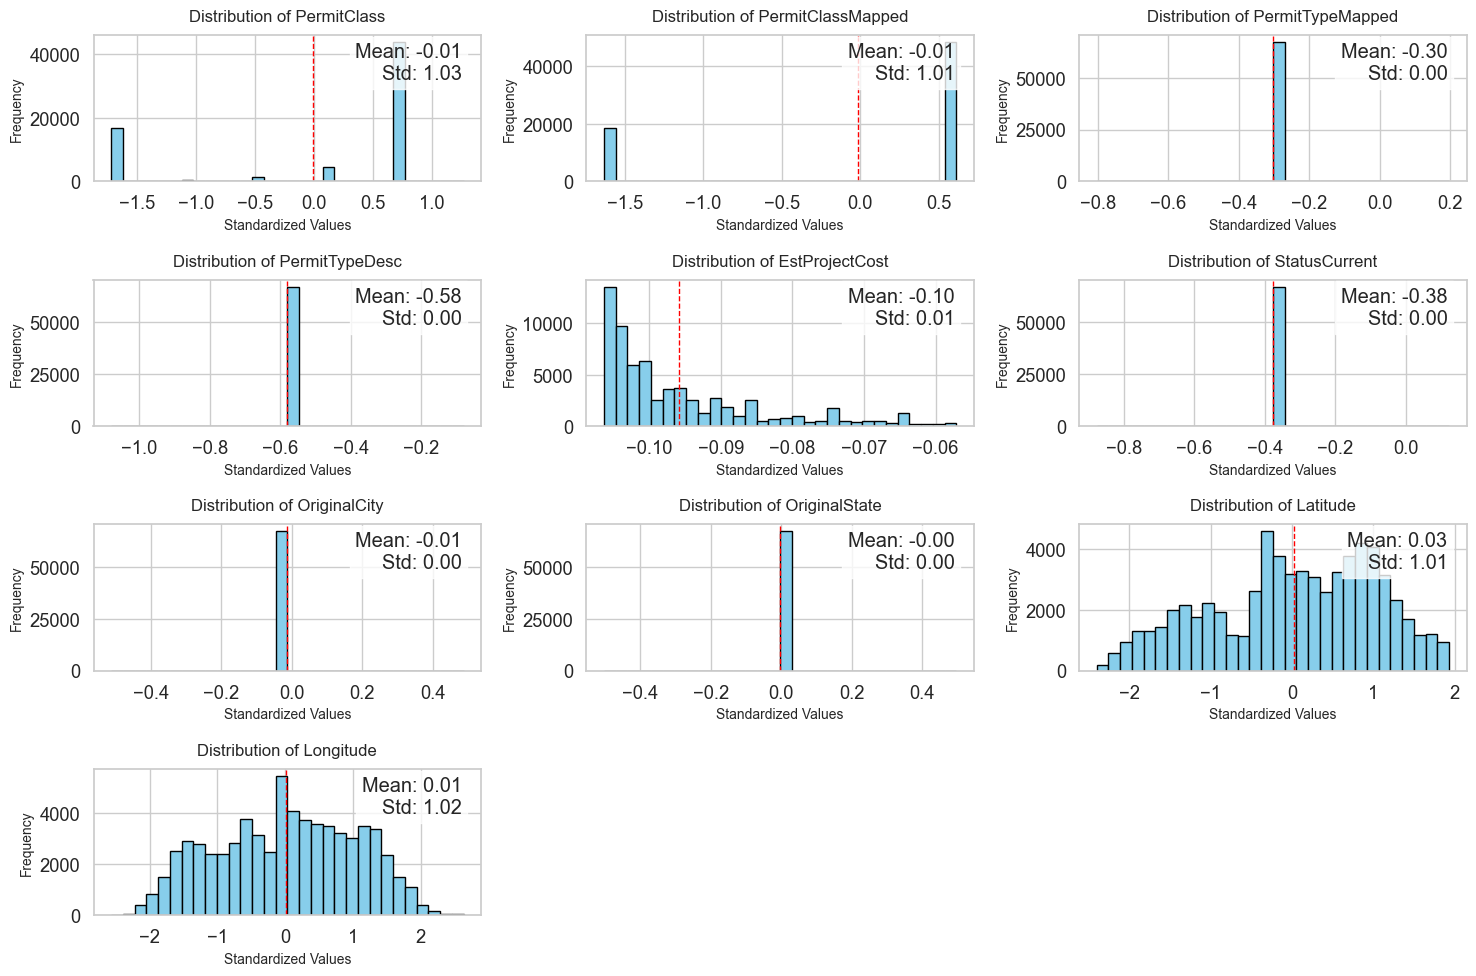

In [53]:
# Ploting the Univariate Analysis of numerical data
fig, axes = plt.subplots(nrows=len(numeric_cols)//3 + 1, 
                        ncols=3, 
                        figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    df[col].hist(ax=ax, bins=30, color='skyblue', edgecolor='black')
    
    # Customize axis labels and titles
    ax.set_xlabel('Standardized Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Distribution of {col}', fontsize=12, pad=10)
    
    # Add mean/std annotation
    ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)
    ax.text(0.95, 0.95, 
            f'Mean: {df[col].mean():.2f}\nStd: {df[col].std():.2f}',
            transform=ax.transAxes,
            ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.8))

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

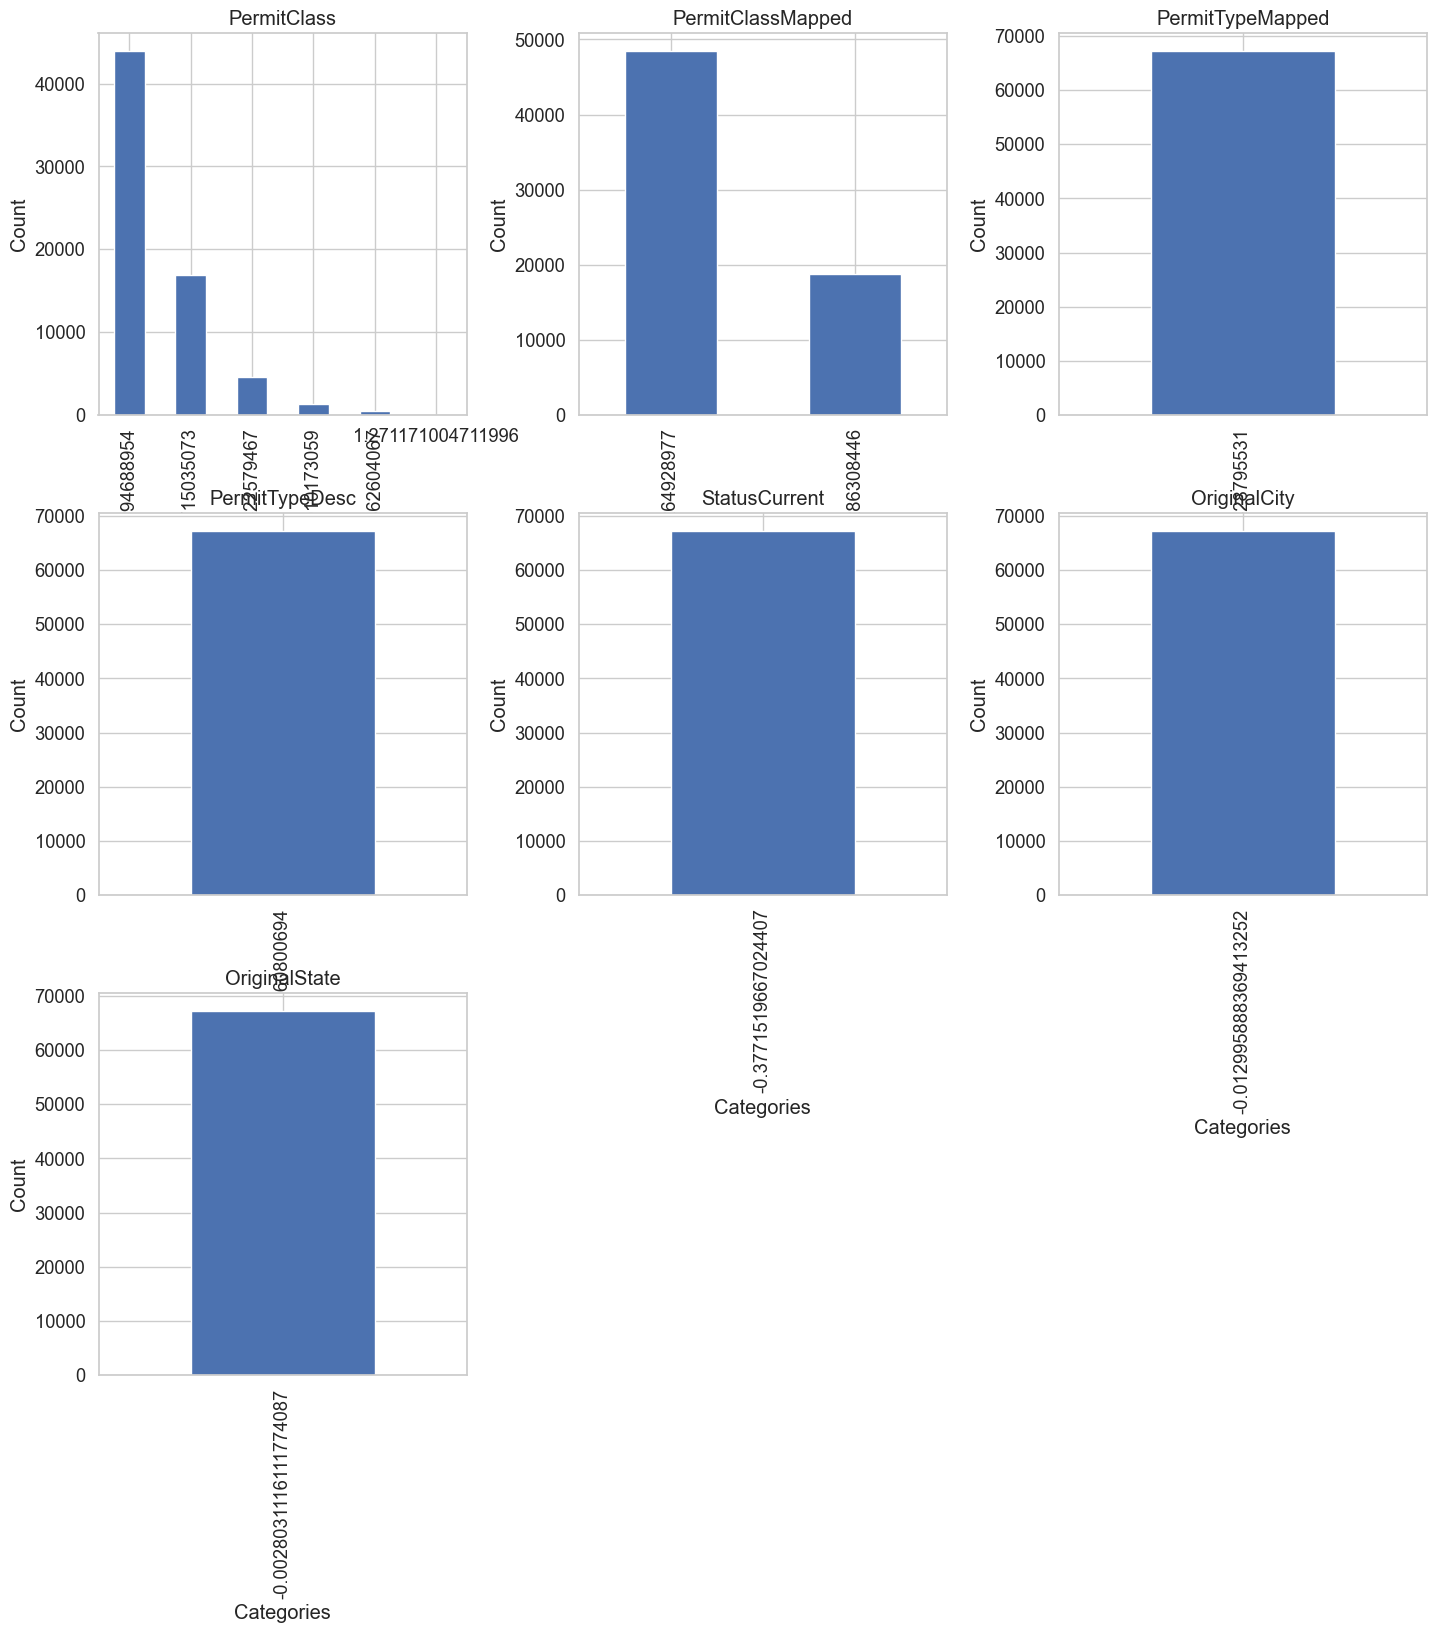

In [54]:
#univariate analysis of categorical data
# Filter categorical columns with fewer than 10 unique values
import math
plot_cols = [col for col in categorical_cols if df[col].nunique() < 10]

# Calculate number of subplots needed
n_cols = min(len(plot_cols), 9)  # Maximum of 9 plots (3x3 grid)
n_rows = math.ceil(n_cols / 3)

# Create figure with subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
fig.tight_layout(pad=3.0)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(plot_cols[:9]):  # Only plot first 9 if more exist
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Categories')  # X-axis label
    axes[i].set_ylabel('Count')       # Y-axis label

# Hide any unused subplots
for j in range(i+1, 9):
    axes[j].axis('off')

plt.show()

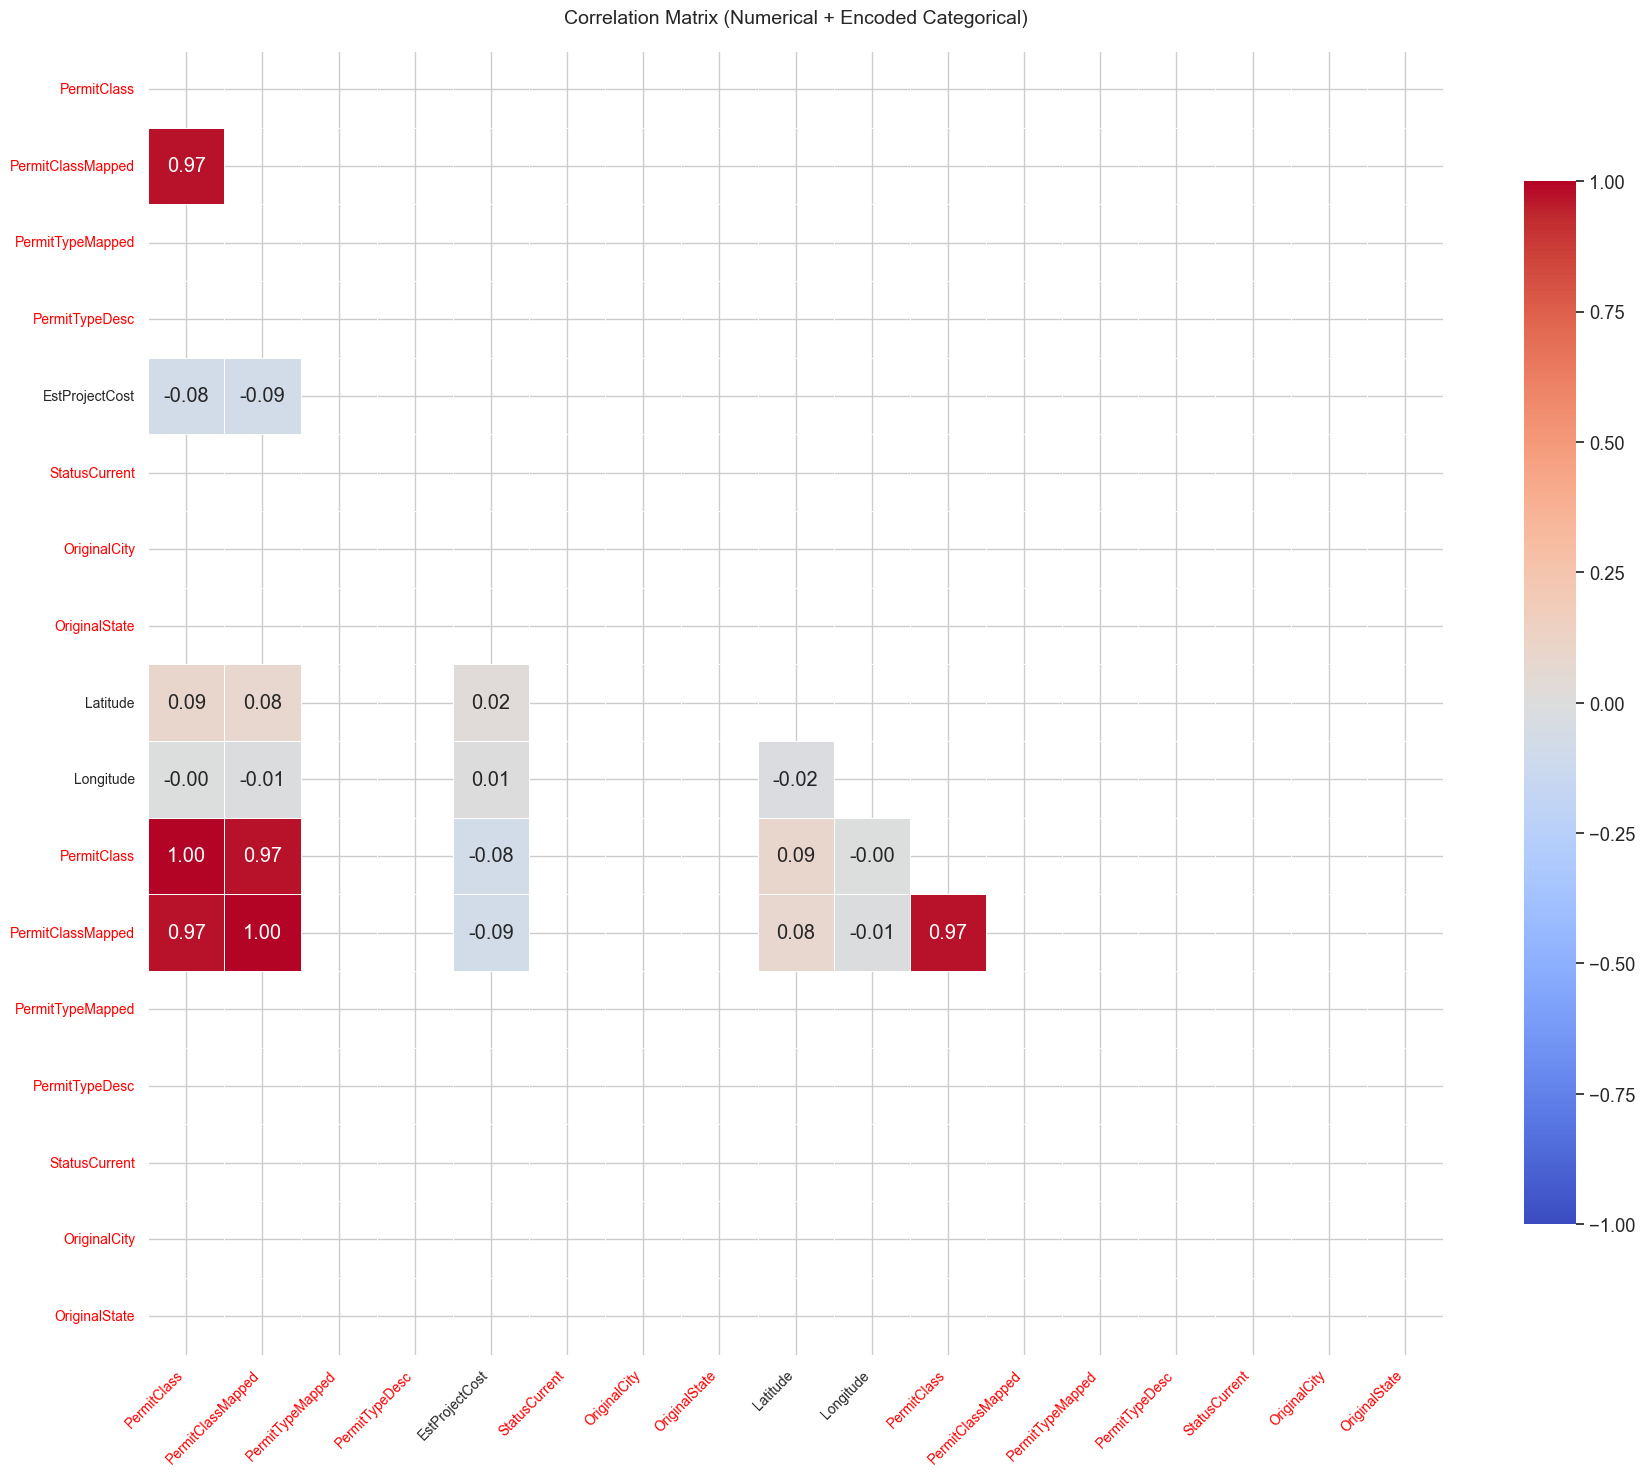

In [55]:
# Correlation Matrix of this data

#combining the numerical and categorical data
analysis_cols = numeric_cols + categorical_cols

#Create correlation matrix
corr_matrix = df[analysis_cols].corr()

#Enhanced heatmap visualization
plt.figure(figsize=(18, 15))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            vmin=-1, vmax=1,
            center=0,
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix (Numerical + Encoded Categorical)", pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add column type annotations if desired
for i, col in enumerate(analysis_cols):
    if col in categorical_cols:
        plt.gca().get_xticklabels()[i].set_color('red')  # Mark categoricals in red
        plt.gca().get_yticklabels()[i].set_color('red')

plt.tight_layout()
plt.show()

In [56]:
# Feature Engineering Function
# Convert date columns from strings to datetime
date_cols = ['AppliedDate', 'IssuedDate', 'CompletedDate']
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# Now calculate day differences
df['ProcessingDays'] = (df['IssuedDate'] - df['AppliedDate']).dt.days
df['CompletionDays'] = (df['CompletedDate'] - df['IssuedDate']).dt.days
df['TotalDays'] = (df['CompletedDate'] - df['AppliedDate']).dt.days

print(df[['AppliedDate', 'IssuedDate', 'ProcessingDays', 'CompletedDate', 'CompletionDays', 'TotalDays']].head())

   AppliedDate IssuedDate  ProcessingDays CompletedDate  CompletionDays  \
41  2005-08-15 2005-09-30            46.0    2005-12-07            68.0   
42  2005-10-03 2005-10-03             0.0    2006-02-21           141.0   
44  2005-12-06 2005-12-06             0.0           NaT             NaN   
48  2005-08-02 2005-08-02             0.0           NaT             NaN   
50  2005-08-19 2005-08-19             0.0    2005-12-20           123.0   

    TotalDays  
41      114.0  
42      141.0  
44        NaN  
48        NaN  
50      123.0  


In [57]:
#basic statistics of the processing time and completion time
import pandas as pd

# Convert to datetime (if not done already)
date_cols = ['AppliedDate', 'IssuedDate', 'CompletedDate']
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

# Calculate days
df['ProcessingDays'] = (df['IssuedDate'] - df['AppliedDate']).dt.days
df['CompletionDays'] = (df['CompletedDate'] - df['IssuedDate']).dt.days

# Basic stats
print("--- Processing Time Stats ---")
print(df['ProcessingDays'].describe())
print("\n--- Completion Time Stats ---")
print(df['CompletionDays'].describe())

--- Processing Time Stats ---
count    67147.000000
mean        37.105455
std        113.065295
min       -551.000000
25%          0.000000
50%          0.000000
75%         42.000000
max       6226.000000
Name: ProcessingDays, dtype: float64

--- Completion Time Stats ---
count    59744.000000
mean       280.578719
std        324.434242
min        -76.000000
25%         83.000000
50%        184.000000
75%        390.000000
max       6154.000000
Name: CompletionDays, dtype: float64


<Axes: title={'center': 'Avg Processing Days by Month'}, xlabel='AppliedMonth'>

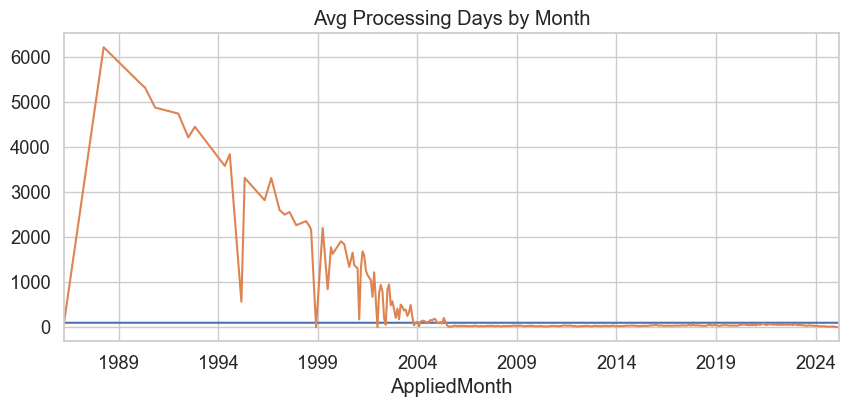

In [58]:
# Time - Based Thrends
# Extract year-month for grouping
df['AppliedMonth'] = df['AppliedDate'].dt.to_period('M')

# Monthly acceptance rate
monthly_acceptance = df.groupby('AppliedMonth')['IssuedDate'].count() / df.groupby('AppliedMonth').size() * 100
monthly_acceptance.plot(title="Monthly Acceptance Rate (%)", figsize=(10, 4))

# Filter accepted applications
accepted_df = df[df['IssuedDate'].notna()]

# Monthly average processing time
monthly_processing = accepted_df.groupby('AppliedMonth')['ProcessingDays'].mean()
monthly_processing.plot(title="Avg Processing Days by Month", figsize=(10, 4))

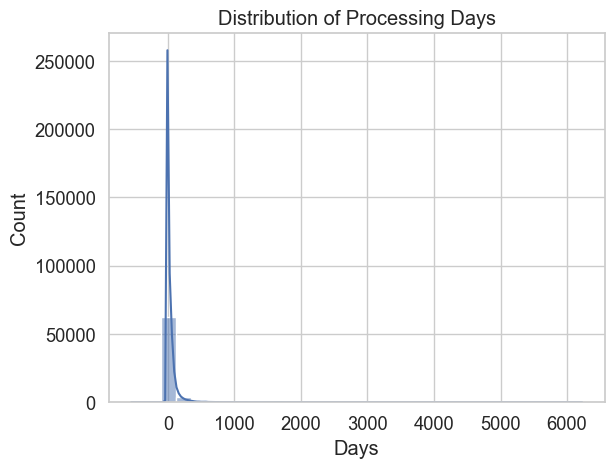

Top 10 Longest Processing Cases:
      AppliedDate IssuedDate  ProcessingDays
14237  1988-04-15 2005-05-02          6226.0
10847  1990-03-21 2004-12-23          5391.0
10505  1990-05-31 2004-12-30          5327.0
2802   1990-11-29 2004-04-14          4885.0
11586  1992-01-18 2005-01-19          4750.0
11102  1992-11-06 2005-01-19          4457.0
2014   1992-07-20 2004-02-09          4221.0
12631  1994-08-18 2005-03-03          3850.0
16700  1996-09-24 2007-01-31          3781.0
1724   2005-12-20 2016-01-12          3675.0


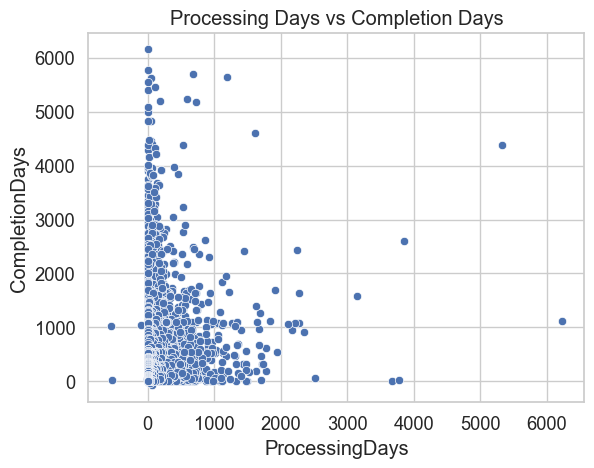

In [59]:
# Advanced Insights in Feature Engineering

# Distribution of Processing Times
import seaborn as sns

sns.histplot(df['ProcessingDays'].dropna(), bins=30, kde=True)
plt.title("Distribution of Processing Days")
plt.xlabel("Days")
plt.show()

# Top 10 Longest Processing Times
longest_processing = df.sort_values('ProcessingDays', ascending=False).head(10)[
    ['AppliedDate', 'IssuedDate', 'ProcessingDays']
]
print("Top 10 Longest Processing Cases:")
print(longest_processing)

# Correlation of Processing Time and Completion Time
sns.scatterplot(data=df, x='ProcessingDays', y='CompletionDays')
plt.title("Processing Days vs Completion Days")
plt.show()

C:\Users\kewal\AppData\Local\Temp\ipykernel_14016\846100833.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_before.index, y=missing_before.values, palette="rocket")
C:\Users\kewal\AppData\Local\Temp\ipykernel_14016\846100833.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_after.index, y=missing_after.values, palette="mako")
C:\Users\kewal\AppData\Local\Temp\ipykernel_14016\846100833.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Records Removed', 'Records Kept'],
C:\Users\kewal\AppData\Local\Temp\ipyke

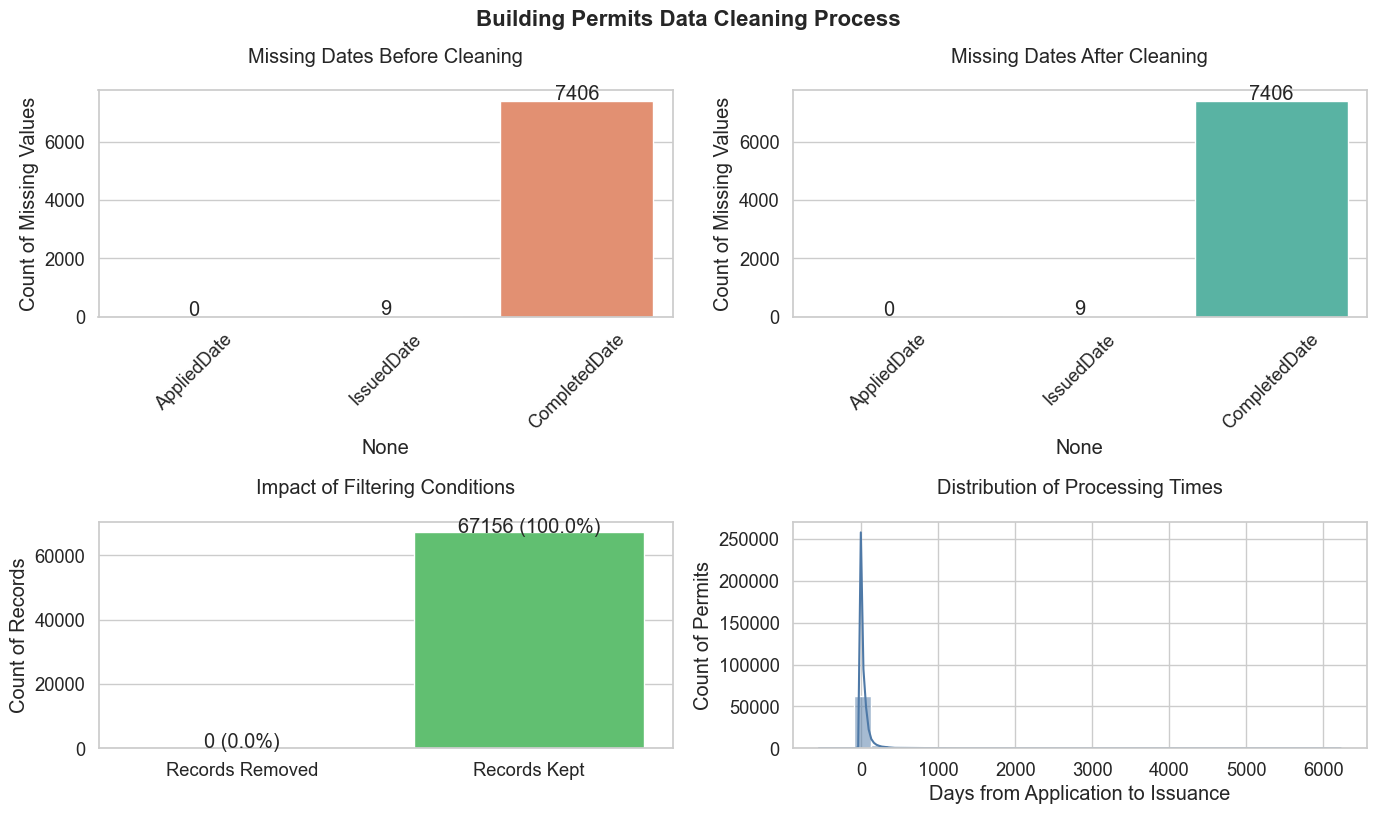

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional academic presentation
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 8))

# 1. Before Cleaning Visualization
plt.subplot(2, 2, 1)
missing_before = df[date_cols].isnull().sum()
sns.barplot(x=missing_before.index, y=missing_before.values, palette="rocket")
plt.title("Missing Dates Before Cleaning", pad=20)
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)

# Add the exact numbers on top of bars
for i, v in enumerate(missing_before.values):
    plt.text(i, v + 50, str(v), ha='center')

# 2. Apply your filtering conditions
condition_to_drop = (
    df["AppliedDate"].isnull() |
    (df["IssuedDate"].isnull() & df["ExpiresDate"].isnull()) |
    (df["IssuedDate"].notnull() & df["CompletedDate"].isnull() & df["ExpiresDate"].isnull())
)
filtered_df = df[~condition_to_drop]

# 3. After Cleaning Visualization
plt.subplot(2, 2, 2)
missing_after = filtered_df[date_cols].isnull().sum()
sns.barplot(x=missing_after.index, y=missing_after.values, palette="mako")
plt.title("Missing Dates After Cleaning", pad=20)
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)

# Add the exact numbers on top of bars
for i, v in enumerate(missing_after.values):
    plt.text(i, v + 50, str(v), ha='center')

# 4. Records Removed Visualization
plt.subplot(2, 2, 3)
removed_count = len(df) - len(filtered_df)
remaining_count = len(filtered_df)
sns.barplot(x=['Records Removed', 'Records Kept'], 
            y=[removed_count, remaining_count],
            palette=['#ff6b6b', '#51cf66'])
plt.title("Impact of Filtering Conditions", pad=20)
plt.ylabel("Count of Records")

# Add percentage annotations
total = len(df)
for i, v in enumerate([removed_count, remaining_count]):
    plt.text(i, v + 50, f"{v} ({v/total:.1%})", ha='center')

# 5. Timeline Analysis (Applied vs Issued Dates)
plt.subplot(2, 2, 4)
valid_dates = filtered_df.dropna(subset=['AppliedDate', 'IssuedDate'])
valid_dates['ProcessingDays'] = (valid_dates['IssuedDate'] - valid_dates['AppliedDate']).dt.days

sns.histplot(valid_dates['ProcessingDays'], bins=30, kde=True, color='#4e79a7')
plt.title("Distribution of Processing Times", pad=20)
plt.xlabel("Days from Application to Issuance")
plt.ylabel("Count of Permits")

# Adjust layout
plt.tight_layout()
plt.suptitle("Building Permits Data Cleaning Process", y=1.02, fontsize=16, fontweight='bold')

# Save high-quality image for presentation
plt.savefig('building_permits_cleaning_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

Dimensionality Reduction (Principle Component Analysis)

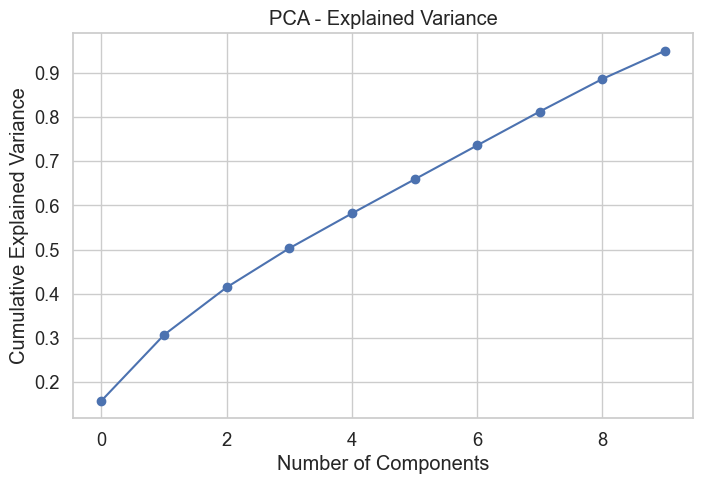

In [61]:
from sklearn.impute import SimpleImputer

df = pd.read_csv('Building_Permits_20250331.csv')
df.drop(columns=['PermitNum', 'Description', 'Link', 'Location1'], inplace=True)
df.dropna(subset=['StatusCurrent'], inplace=True)

df['StatusBinary'] = df['StatusCurrent'].apply(lambda x: 1 if 'Complete' in x else 0)

categorical = ['PermitClass', 'PermitClassMapped', 'PermitTypeMapped', 'PermitTypeDesc', 'OriginalCity', 'OriginalState']
df[categorical] = df[categorical].fillna('Unknown')
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['StatusCurrent', 'StatusBinary'])  # Features
y = df['StatusBinary']  # Target

numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)

X_final = X_numeric_imputed.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# 📉 Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 📊 Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()


Random Forest:
               precision    recall  f1-score   support

           0       0.65      0.52      0.58     16007
           1       0.81      0.88      0.85     37922

    accuracy                           0.77     53929
   macro avg       0.73      0.70      0.71     53929
weighted avg       0.76      0.77      0.77     53929



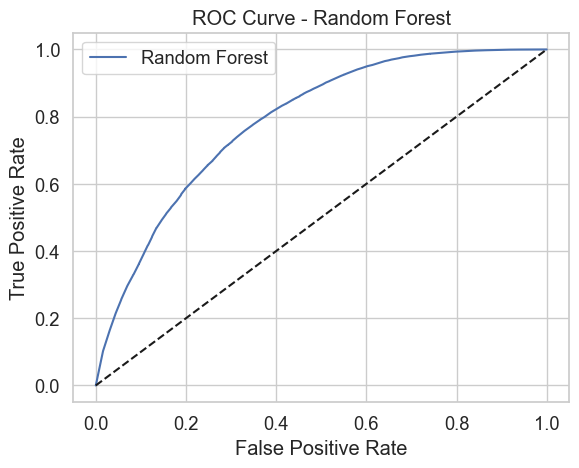

RF AUC Score: 0.787879970087318


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_model_input = X_pca  # or use X_scaled if you want without dimensionality reduction

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_model_input, y, test_size=0.3, random_state=42)

# Random Forest with class_weight
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# ROC Curve - Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()
print("RF AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))



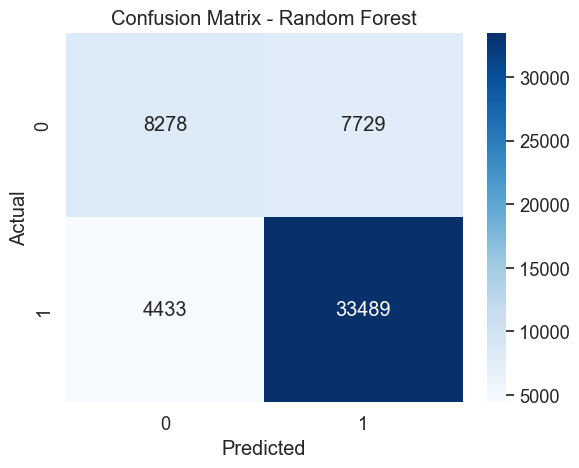

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [69]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Accuracy Score: 0.7744812624005637
